# Ejercicio Regresión Lineal


¡Felicidades! Acaba de obtener un contrato de trabajo con una empresa de comercio electrónico, con sede en la ciudad de Nueva York, que vende ropa en línea, pero también tiene sesiones de asesoramiento de estilo y ropa en la tienda. Los clientes entran a la tienda, tienen sesiones / reuniones con un estilista personal, luego pueden ir a casa y pedir la ropa que desean, ya sea en una aplicación móvil o en un sitio web.

La compañía está tratando de decidir si debe enfocar sus esfuerzos en su experiencia de aplicación móvil o en su sitio web. ¡Te han contratado para ayudarles a resolverlo! ¡Empecemos!

Simplemente sigue los pasos que se indican a continuación, para analizar los datos del cliente (los datos son falsos, no te preocupes, no se proporcionan números de tarjeta de crédito o correos electrónicos reales).

## Importar las librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargar los datos

Trabajaremos con el archivo csv "Ecommerce Customers" de la compañía. Tiene información del cliente, como correo electrónico, dirección y color de su Avatar. También tiene columnas de valor numérico:

* Avg. Session Length: duración promedio de las sesiones de asesoramiento de estilo en la tienda.
* Time on App: tiempo promedio empleado en la aplicación en minutos
* Time on Website: tiempo promedio de permanencia en el sitio web en minutos
* Length of Membership: cuántos años ha sido miembro el cliente.

**Lee el archivo csv de "Ecommerce Customers" como un DataFrame llamado customers.**

In [3]:
customers = pd.read_csv('Ecommerce Customers.csv')

**Verifica los datos de customers mediante las funciones head(), describe() e info()**

In [4]:
## Escribe tu código aqui
customers.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
## Escribe tu código aqui


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
## Escribe tu código aqui


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## EDA

**Usa seaborn para crear un gráfico jointplot para comparar las columnas del tiempo en el sitio web (Time on Website) y la cantidad anual gastada (Yearly Amount Spent). ¿Tiene sentido la correolación?**

**¡Vamos a explorar los datos!**

Para el resto del ejercicio, solo utilizaremos los datos numéricos del archivo csv.

In [7]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

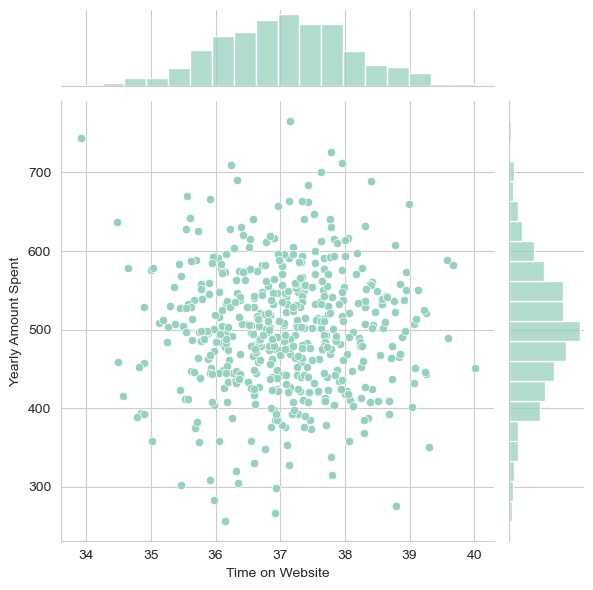

In [8]:
## Escribe tu código aqui
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

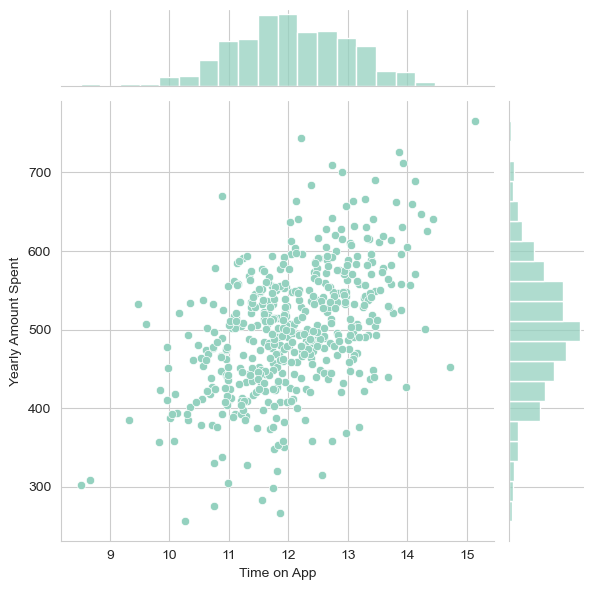

In [9]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

**Lo mismo pero ahora con la columna de tiempo en la aplicación (Time on App)**

In [ ]:
## Escribe tu código aqui


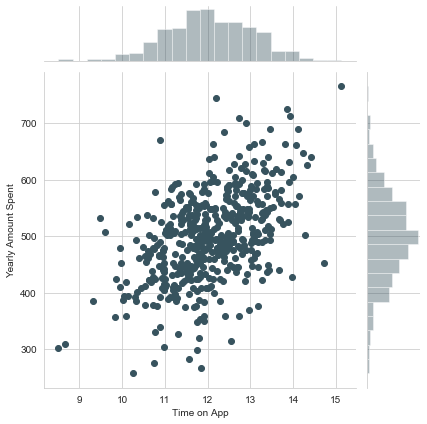

**Exploremos las relaciones que existen en todo el conjunto de datos. Usa [pairplot] (https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) para recrear el diagrama siguiente**

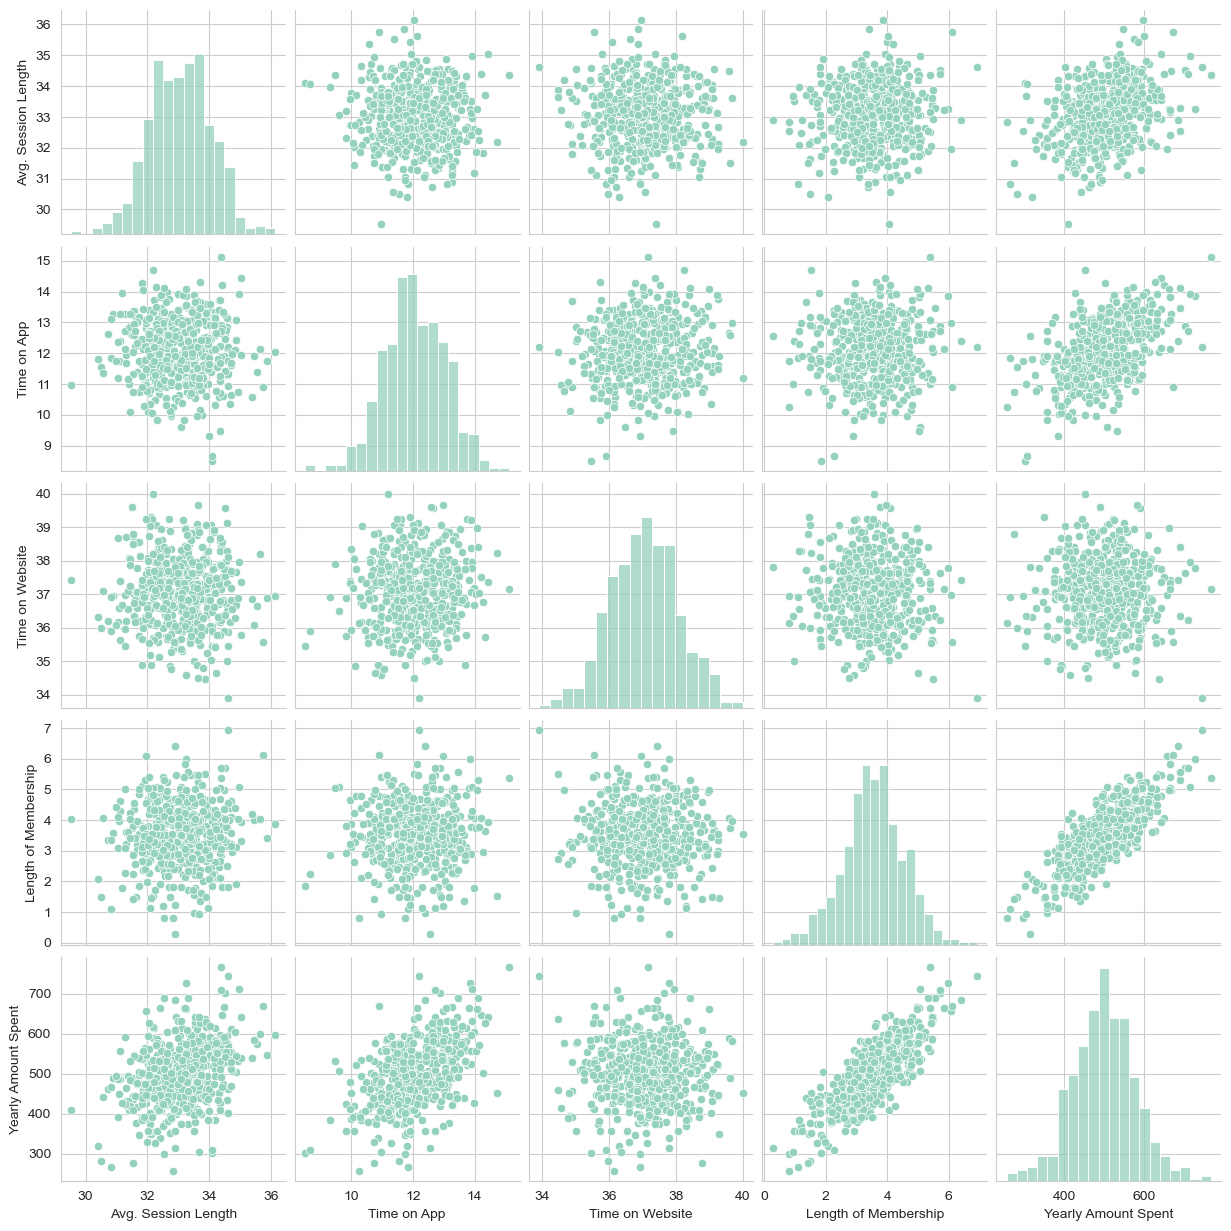

In [10]:
## Escribe tu código aqui
sns.pairplot(customers)

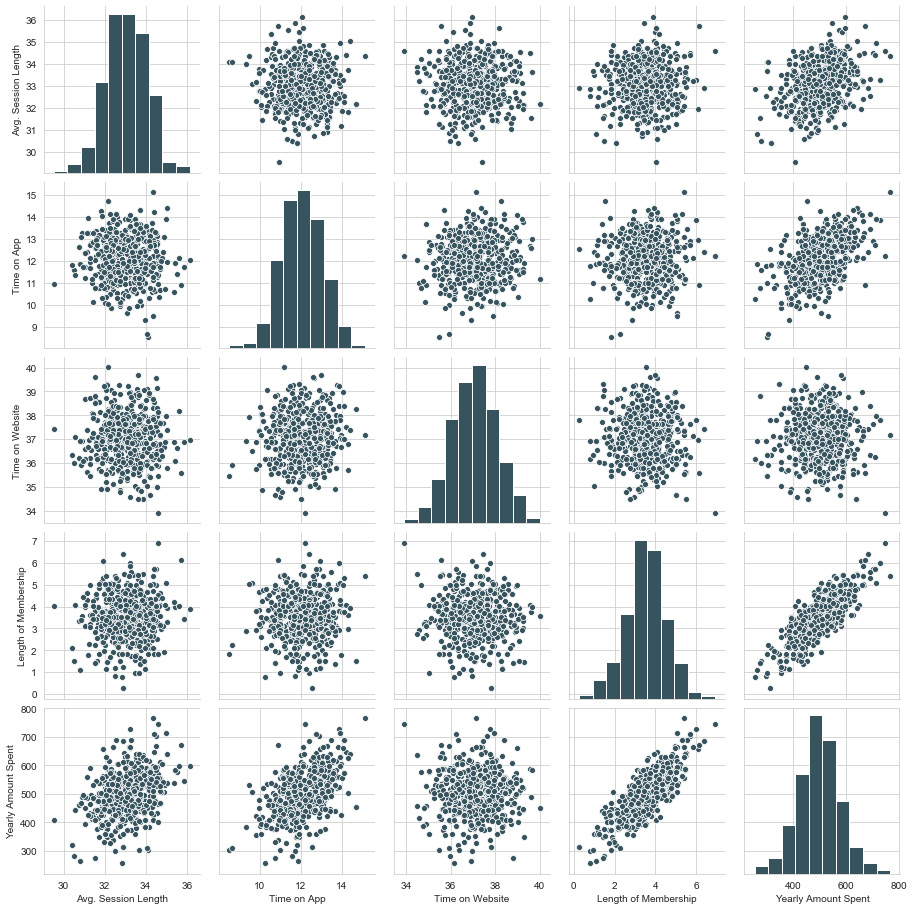

**Basado en esta gráfica, ¿cuál parece ser la característica más correlacionada con la cantidad anual gastada (Yearly Amount Spent)?**

- Length of Membership

**Crea un gráfico lineal (usando lmplot de seaborn) de la cantidad anual gastada (Yearly Amount Spent) vs. el tiempo de la membresía (Length of Membership).**

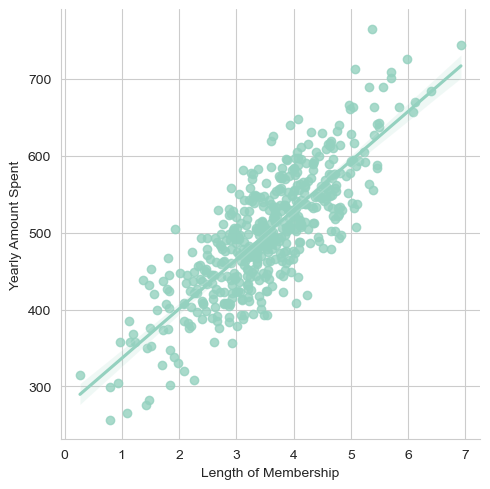

In [11]:
## Escribe tu código aqui
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

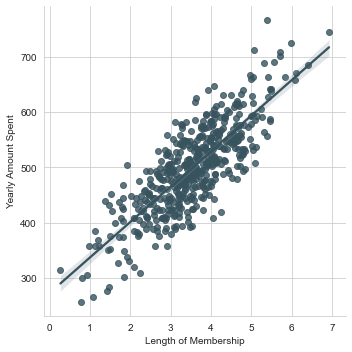

## Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de pruebas

**Establece una variable "X" igual a las características numéricas de los clientes y una variable "y" igual a la columna cantidad anual gastada (Yearly Amount Spent).**

In [12]:
y = customers['Yearly Amount Spent']

In [13]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

**Usa la librería model_selection.train_test_split de sklearn para dividir los datos en conjuntos de entrenamiento y prueba. Establece test_size = 0.3 y random_state = 101 **

In [15]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21)

## Entrenando el modelo

Ahora entrenemos el modelo con nuestros datos de entrenamiento!

**Importa la libreria LinearRegression de sklearn.linear_model**

In [39]:
from sklearn.linear_model import LinearRegression

**Crea una instancia de LinearRegression() llamada "lm".**

In [40]:
lm = LinearRegression()

In [41]:
lm.fit(X_train,y_train)

LinearRegression()

**Imprime los coeficientes resultantes del modelo**

In [42]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.145545
Time on App,38.973649
Time on Website,0.703782
Length of Membership,61.761437


In [43]:
## Escribe tu código aqui
print('Coeficientes del modelo: \t', lm.coef_)

Coeficientes del modelo: 	 [25.14554472 38.97364852  0.70378231 61.76143709]


Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicción

**Usa lm.predict() para predecir los valores con los datos de prueba (X_test) del conjunto de datos.**

In [44]:
lm.predict(X_test)

array([464.04405827, 562.69668296, 556.20180346, 577.49673415,
       627.57536412, 479.27985182, 552.61885867, 529.49926756,
       466.82603062, 437.21701087, 522.50086628, 425.80862223,
       480.9714103 , 441.44943023, 606.74882927, 456.15575141,
       371.61989573, 394.8284083 , 517.16248241, 437.36618792,
       540.72623837, 570.75994841, 751.29980064, 617.32239652,
       507.11592972, 548.78849364, 437.74974787, 517.92605725,
       591.81564694, 556.91506152, 403.78232257, 400.05392497,
       608.67056183, 576.54316796, 512.11799242, 616.60022507,
       542.38035095, 513.90415933, 573.35019816, 398.48046358,
       494.74055944, 465.07657382, 518.32198042, 427.78588823,
       532.62849267, 651.56270891, 356.69410251, 499.66080004,
       458.62979006, 578.79735003, 417.51546059, 551.02634772,
       584.44437181, 519.86444746, 534.08844107, 543.2285097 ,
       570.73414572, 518.42394499, 547.09507227, 529.84095898,
       535.12556721, 441.44813828, 561.37960158, 486.78

**Cree un gráfico de los valores reales contra los de la predicción**

C:\Users\Miguel.Mondragon\AppData\Local\Temp\ipykernel_596\213937076.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Valor real")
C:\Users\Miguel.Mondragon\AppData\Local\Temp\ipykernel_596\213937076.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

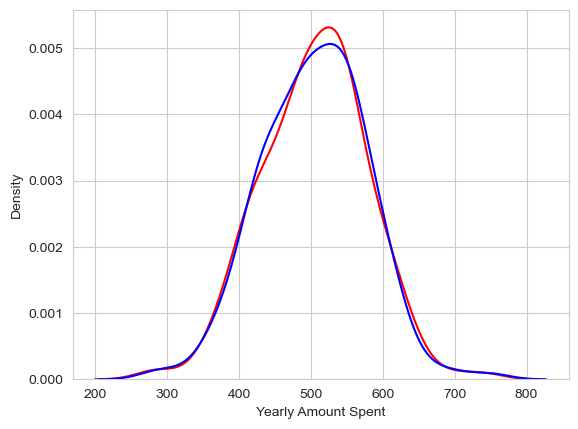

In [45]:
## Escribe tu código aqui
ax1 = sns.distplot(y_test, hist=False, color="r", label="Valor real")
sns.distplot(lm.predict(X_test), hist=False, color="b", label="Predicción" , ax=ax1)

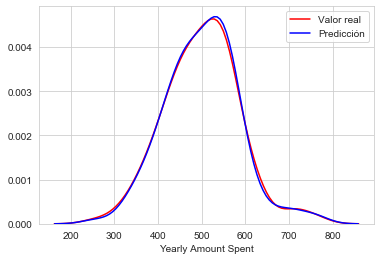

Text(0, 0.5, 'Predicted Y')

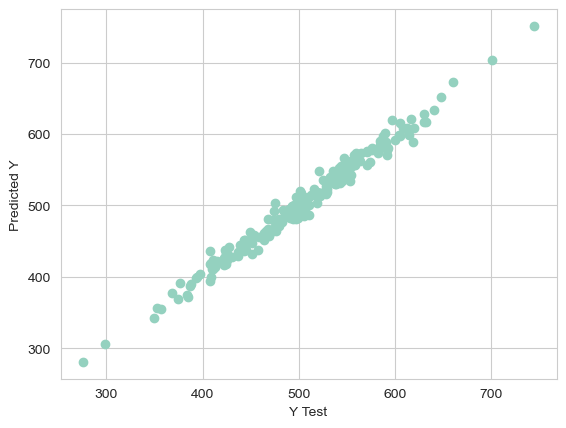

In [47]:
## Escribe tu código aqui
plt.scatter(y_test,lm.predict(X_test))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Y')

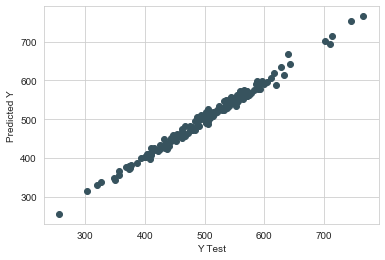

## Evaluando el modelo


Evaluemos el rendimiento de nuestro modelo calculando la suma residual de cuadrados y el coeficiente de determinación (R ^ 2).

**Calcule el error absoluto medio, el error cuadrático medio y la raiz del error cuadrático medio. Consulte la conferencia o Wikipedia para las fórmulas**

In [25]:
from sklearn import metrics

In [46]:
## Escribe tu código aqui
prediccion = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, prediccion))
print('MSE:', metrics.mean_squared_error(y_test, prediccion))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediccion)))

MAE: 7.6536006116595106
MSE: 94.06631188467273
RMSE: 9.69877888626567


MAE: 7.228148653430838
MSE: 79.81305165097461
RMSE: 8.933815066978642


## Resultados

Deberías haber conseguido un muy buen modelo con un buen ajuste. Exploremos rápidamente los resultados para asegurarnos de que todo esté bien con nuestros datos.

**Traza un histograma de los residuos y asegúrate de que tenga una distribución normal. Use seaborn distplot o simplemente plt.hist ().**

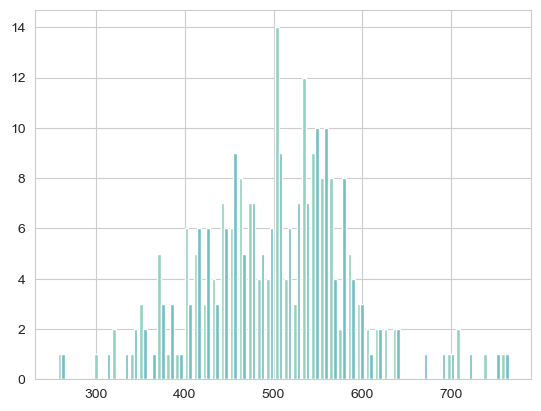

In [30]:
## Escribe tu código aqui
plt.hist((y_test, prediccion),bins=50);

<Axes: ylabel='Count'>

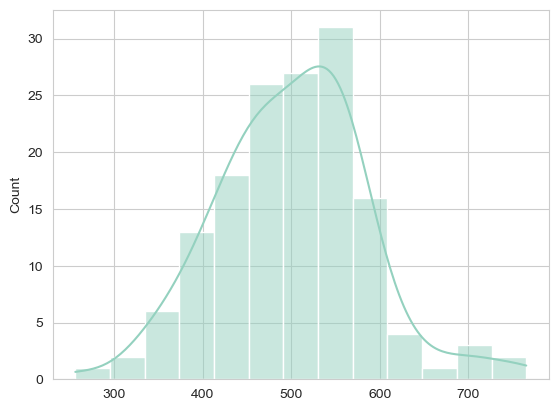

In [33]:
sns.histplot(prediccion, kde = True)

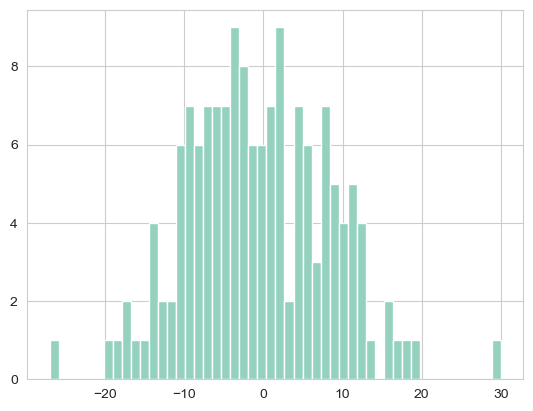

In [35]:
plt.hist((y_test - prediccion),bins=50);

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

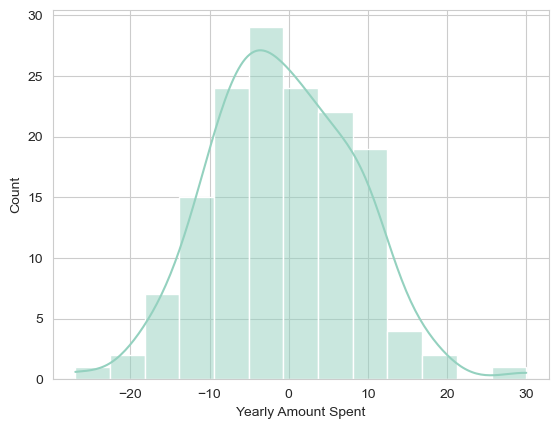

In [36]:
sns.histplot(y_test - prediccion, kde = True)

## Conclusiones
Todavía necesitamos encontrar la respuesta a la pregunta original, ¿enfocamos nuestro esfuerzo en el desarrollo de aplicaciones móviles o sitios web? O tal vez eso ni siquiera importa, y el tiempo de membresía es lo realmente importante. Veamos si podemos interpretar los coeficientes para tener una idea.

**Recrea el dataframe de abajo.**

In [32]:
## Escribe tu código aqui
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**¿Como podemos interpretar los resultados?**

**¿Dónde crees que la empresa debe enfocarse: en la aplicación móbil o en su website?**

## ¡Buen trabajo!